<a href="https://colab.research.google.com/github/azdinelaaouissi/Pfa/blob/main/dl_form2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import seaborn as sns
from  sklearn.model_selection  import  train_test_split
from  tensorflow.keras.layers  import  Dense
from  tensorflow.keras.models  import  Sequential
import  warnings
warnings.filterwarnings('ignore')

In [4]:
path="/content/drive/MyDrive/PFA/regression"

##  EDA

In [5]:
df=pd.read_csv(path+"/kc_house_data.csv")

# Description des colonnes du dataset

1. **id** : Identifiant unique de la propriété.
2. **date** : Date de la vente de la propriété.
3. **price** : Prix de vente de la propriété.
4. **bedrooms** : Nombre de chambres dans la propriété.
5. **bathrooms** : Nombre de salles de bains dans la propriété (peut inclure des fractions pour des demi-salles de bains).
6. **sqft_living** : Surface habitable intérieure en pieds carrés.
7. **sqft_lot** : Surface totale du terrain en pieds carrés.
8. **floors** : Nombre d'étages de la propriété.
9. **waterfront** : Indicateur si la propriété a une vue sur l'eau (1 pour oui, 0 pour non).
10. **view** : Indicateur de la qualité de la vue de la propriété (0 à 4).
11. **condition** : État général de la propriété (1 à 5).
12. **grade** : Classification de la qualité de la construction et du design de la maison (1 à 13).
13. **sqft_above** : Surface habitable en pieds carrés au-dessus du niveau du sol.
14. **sqft_basement** : Surface habitable en pieds carrés au sous-sol.
15. **yr_built** : Année de construction de la propriété.
16. **yr_renovated** : Année de la dernière rénovation de la propriété (0 si jamais rénovée).
17. **zipcode** : Code postal de la propriété.
18. **lat** : Latitude géographique de la propriété.
19. **long** : Longitude géographique de la propriété.
20. **sqft_living15** : Surface habitable moyenne des 15 maisons les plus proches en pieds carrés.
21. **sqft_lot15** : Surface totale moyenne du terrain des 15 maisons les plus proches en pieds carrés.


In [6]:
df.shape

(21597, 21)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [10]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [11]:
df.duplicated().sum()

0

<Axes: xlabel='price', ylabel='Density'>

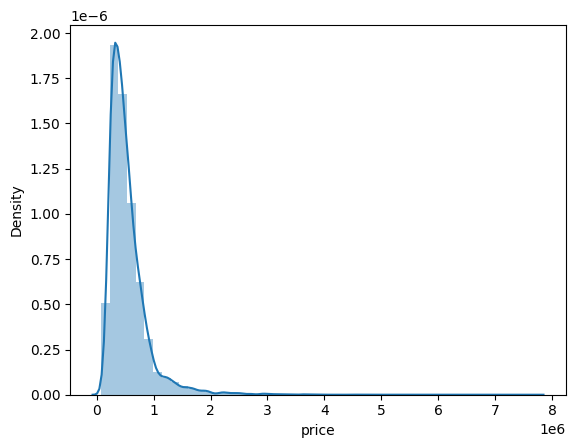

In [12]:
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

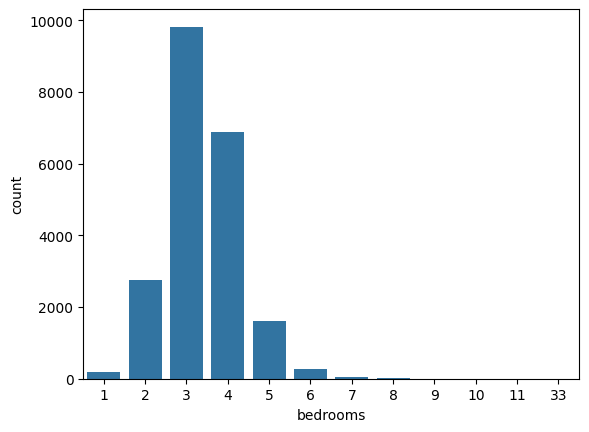

In [13]:
sns.countplot(x=df['bedrooms'])

In [14]:
df.drop("date",axis=1).corr()['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
view,0.397370
sqft_basement,0.323799
bedrooms,0.308787
lat,0.306692


<Axes: xlabel='price', ylabel='sqft_living'>

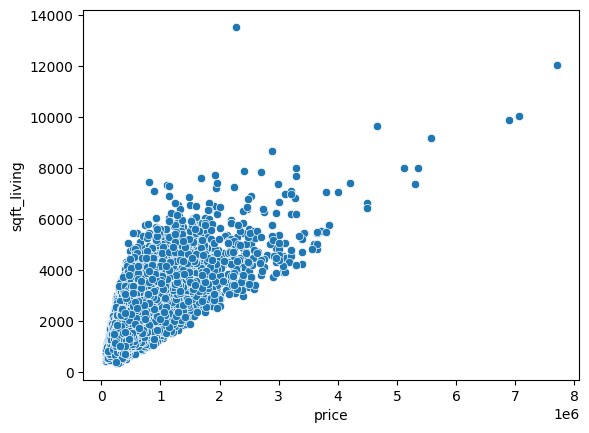

In [15]:
sns.scatterplot(y=df['sqft_living'],x=df['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

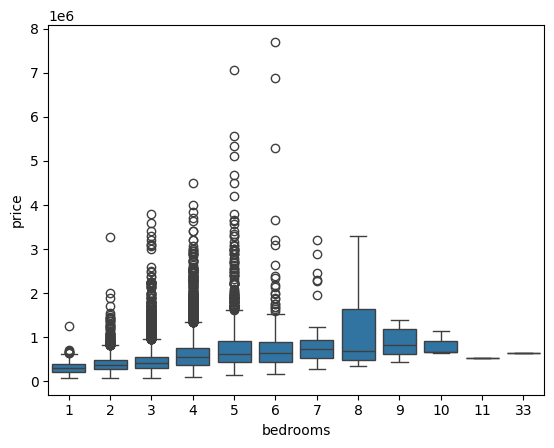

In [16]:
sns.boxplot(x=df['bedrooms'],y=df['price'])

<Axes: xlabel='price', ylabel='long'>

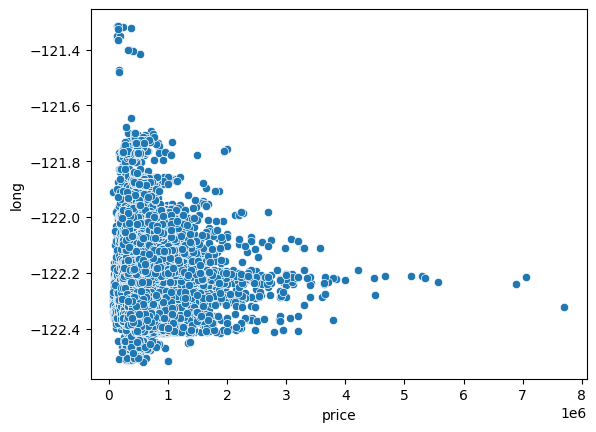

In [17]:
sns.scatterplot(x=df['price'],y=df["long"])

<Axes: xlabel='price', ylabel='lat'>

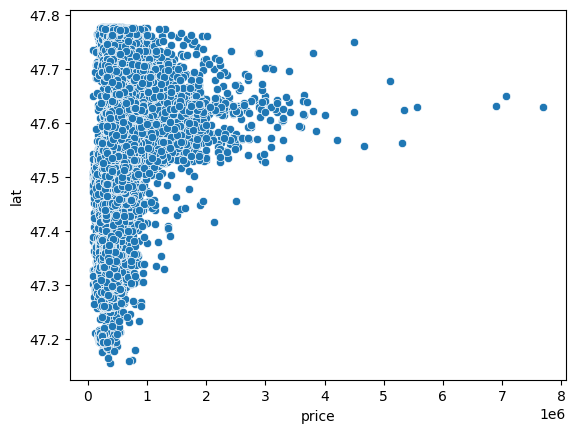

In [18]:
sns.scatterplot(x=df['price'],y=df["lat"])

<Axes: xlabel='long', ylabel='lat'>

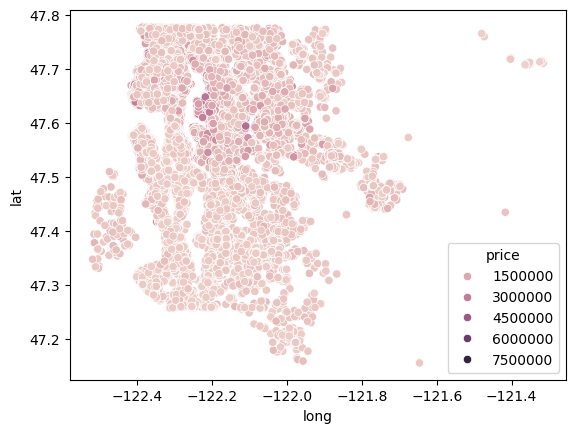

In [19]:
sns.scatterplot(x=df['long'],y=df["lat"],hue=df['price'])

In [20]:
# Supposons que df est votre DataFrame et 'price' est la colonne des prix
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [21]:
df.shape

(20439, 21)

<Axes: xlabel='price', ylabel='Density'>

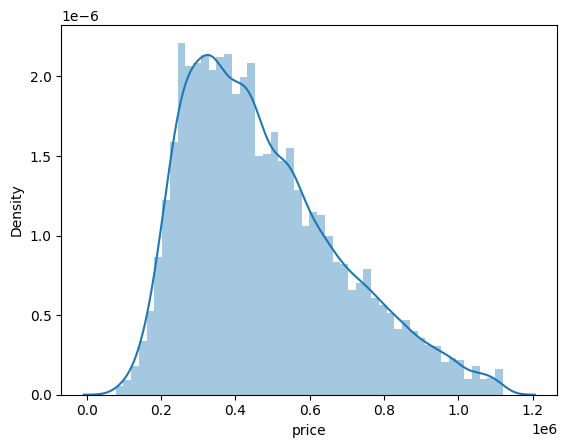

In [22]:
sns.distplot(df['price'])

<Axes: xlabel='long', ylabel='lat'>

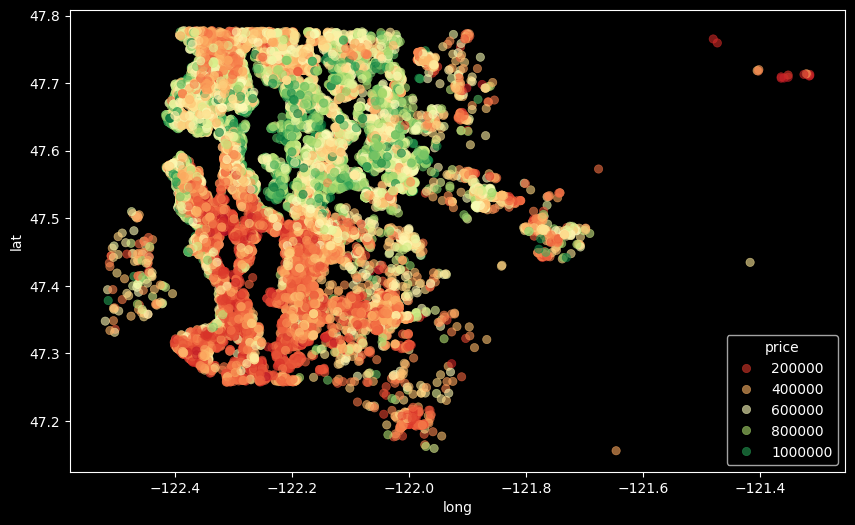

In [23]:
plt.style.use('dark_background')

# Créer le graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'], palette='RdYlGn', edgecolor=None, alpha=0.6)


In [24]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
df.drop(['id','zipcode'],axis=1,inplace=True)

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df["year"]=df["date"].apply(lambda x:x.year)
df["month"]=df["date"].apply(lambda x:x.month)

In [28]:
df.drop("date",axis=1,inplace=True)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


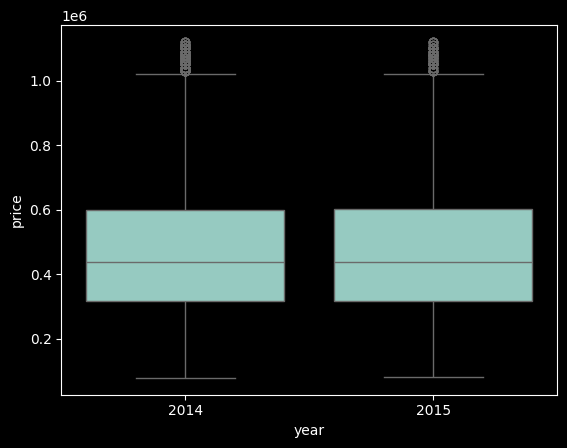

In [31]:
sns.boxplot(x='year',y='price',data=df);

<Axes: xlabel='year'>

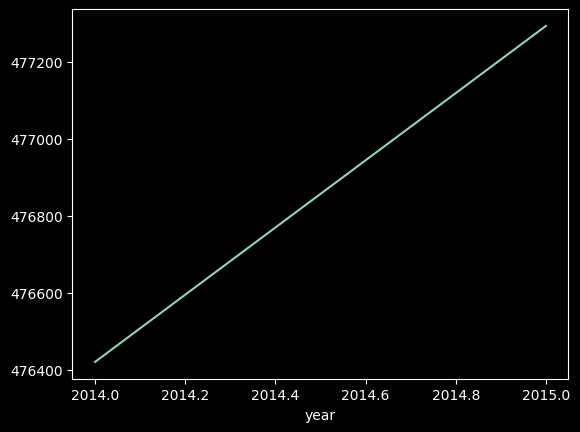

In [32]:
df.groupby("year").mean()["price"].plot()

<Axes: xlabel='month'>

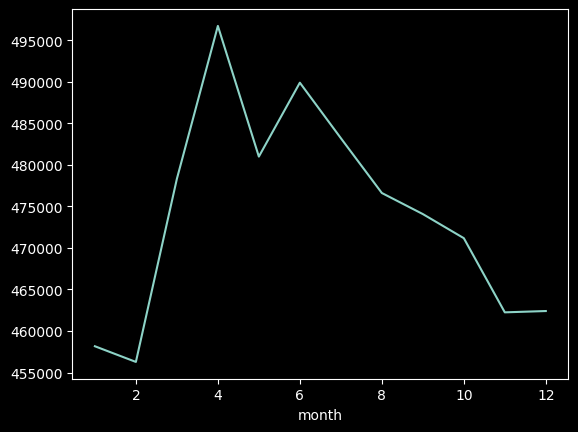

In [33]:
df.groupby("month").mean()["price"].plot()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20439 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20439 non-null  float64
 1   bedrooms       20439 non-null  int64  
 2   bathrooms      20439 non-null  float64
 3   sqft_living    20439 non-null  int64  
 4   sqft_lot       20439 non-null  int64  
 5   floors         20439 non-null  float64
 6   waterfront     20439 non-null  int64  
 7   view           20439 non-null  int64  
 8   condition      20439 non-null  int64  
 9   grade          20439 non-null  int64  
 10  sqft_above     20439 non-null  int64  
 11  sqft_basement  20439 non-null  int64  
 12  yr_built       20439 non-null  int64  
 13  yr_renovated   20439 non-null  int64  
 14  lat            20439 non-null  float64
 15  long           20439 non-null  float64
 16  sqft_living15  20439 non-null  int64  
 17  sqft_lot15     20439 non-null  int64  
 18  year       

In [35]:
X=df.drop("price",axis=1)
y=df["price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from  sklearn.preprocessing  import  MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
y_train

,price
2874,720000.0
16348,650000.0
10003,521000.0
5635,480000.0
10910,215000.0
12736,515000.0
10825,700000.0
3136,473000.0
14793,410000.0
19848,435000.0


Arguments
x (ou X_train) :

Description : Ce paramètre représente les données d'entraînement. X_train est une matrice ou un tableau contenant les caractéristiques (features) d'entraînement du modèle. Chaque ligne représente un échantillon et chaque colonne représente une caractéristique.
Exemple : Si vous avez un ensemble de données de maisons avec des caractéristiques comme la surface habitable, le nombre de chambres, etc., X_train contiendrait ces valeurs pour chaque maison dans l'ensemble d'entraînement.

y (ou y_train.values) :

Description : Ce paramètre représente les étiquettes ou les valeurs cibles associées aux données d'entraînement. y_train.values est utilisé pour s'assurer que les étiquettes sont sous forme de tableau NumPy, ce qui est souvent requis par les bibliothèques de machine learning.
Exemple : Si vous prédisez les prix des maisons, y_train contiendrait les prix correspondants pour chaque maison dans l'ensemble d'entraînement.

validation_data :

Description : Ce paramètre est un tuple (X_test, y_test.values) contenant les données de validation, qui sont utilisées pour évaluer le modèle pendant l'entraînement. Les données de validation permettent de vérifier la performance du modèle sur un ensemble de données distinct de celui utilisé pour l'entraînement afin de détecter le surapprentissage (overfitting).
Exemple : X_test contiendrait les caractéristiques des maisons dans l'ensemble de validation et y_test contiendrait les prix correspondants pour ces maisons.

batch_size :

Description : Ce paramètre spécifie le nombre d'échantillons à utiliser pour chaque itération de mise à jour des poids du modèle. Un plus petit batch size rendra l'entraînement plus lent mais plus précis, tandis qu'un batch size plus grand accélérera l'entraînement mais pourrait réduire la précision.
Exemple : Si vous avez 128 échantillons dans un batch, le modèle mettra à jour ses poids après avoir calculé les gradients pour ces 128 échantillons.

epochs :

Description : Ce paramètre spécifie le nombre de fois que l'ensemble de données d'entraînement complet sera passé à travers le réseau de neurones pendant l'entraînement. Plus le nombre d'epochs est élevé, plus le modèle aura de chances d'apprendre des données, mais cela pourrait aussi augmenter le risque de surapprentissage.
Exemple : Si epochs est défini à 400, l'ensemble de données complet sera passé 400 fois à travers le réseau pendant l'entraînement.

In [55]:
model=Sequential()
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))

model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [56]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=400)

Epoch 1/400
128/128 [==============================] - 2s 5ms/step - loss: 270904606720.0000 - val_loss: 268248023040.0000
Epoch 2/400
128/128 [==============================] - 0s 4ms/step - loss: 269081870336.0000 - val_loss: 262152372224.0000
Epoch 3/400
128/128 [==============================] - 1s 4ms/step - loss: 246709059584.0000 - val_loss: 213435531264.0000
Epoch 4/400
128/128 [==============================] - 1s 4ms/step - loss: 157591502848.0000 - val_loss: 88808112128.0000
Epoch 5/400
128/128 [==============================] - 1s 4ms/step - loss: 49518288896.0000 - val_loss: 28441284608.0000
Epoch 6/400
128/128 [==============================] - 1s 4ms/step - loss: 28428363776.0000 - val_loss: 27066394624.0000
Epoch 7/400
128/128 [==============================] - 1s 4ms/step - loss: 27946319872.0000 - val_loss: 26684385280.0000
Epoch 8/400
128/128 [==============================] - 1s 4ms/step - loss: 27589220352.0000 - val_loss: 26315372544.0000
Epoch 9/400
128/128 [====

<Axes: >

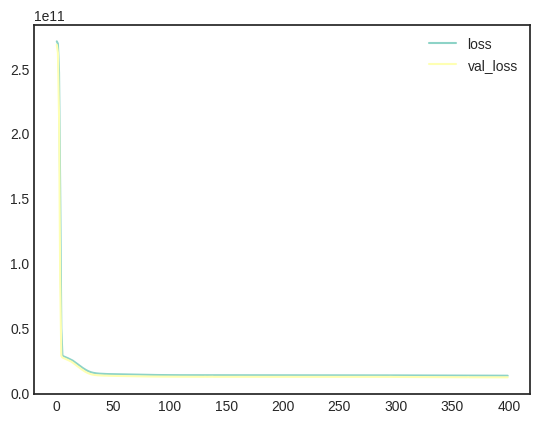

In [57]:
plt.style.use('seaborn-white')
losses=pd.DataFrame(model.history.history)
losses.plot()

In [58]:
y_pred=model.predict(X_test)

128/128 [==============================] - 0s 2ms/step


In [59]:
from  sklearn.metrics  import  mean_squared_error,mean_absolute_error,r2_score,explained_variance_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Affichage des résultats
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² (coefficient de détermination): {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Squared Error (MSE): 11802132094.919594
Root Mean Squared Error (RMSE): 108637.61823106946
Mean Absolute Error (MAE): 81523.64855598703
R² (coefficient de détermination): 0.7171814673074925
Explained Variance Score: 0.7180025797272838


In [60]:
df.price.describe()

,price
count,2.043900e+04
mean,4.767026e+05
std,2.077903e+05
min,7.800000e+04
25%,3.150000e+05
50%,4.375000e+05
75%,6.000000e+05
max,1.120000e+06


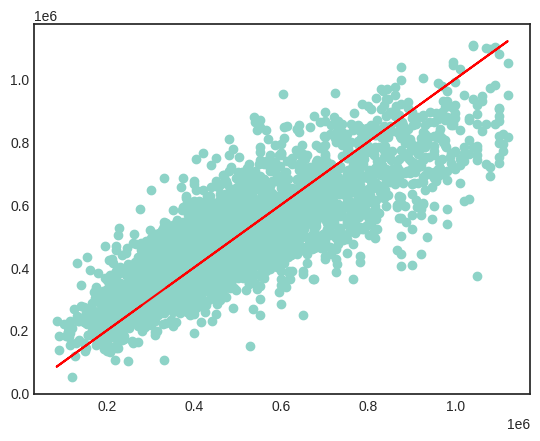

In [63]:
# Nos prédictions
plt.scatter(y_test,y_pred)

# Prédictions parfaites
plt.plot(y_test,y_test,'r');